1.Load data

In [3]:
import pandas as pd
# Load the dataset
#data = pd.read_csv('Dataset1_Weatherdata.csv')
data = pd.read_csv("Data/All_data.csv")
print(data.head())

   ST04   K  SMV01  SMV10  CRP  SMV20   N  ST04.1  ST01  PRCPC  ...    T0  \
0  20.5  13  0.388  0.435    0  0.437  21   174.0  20.6  79.17  ...  20.7   
1  20.5  13  0.385  0.434    0  0.437  21   173.6  20.6  16.67  ...  20.8   
2  20.5  13  0.378  0.433    0  0.437  21   173.2  20.8  20.83  ...  21.1   
3  20.5  13  0.371  0.431    0  0.437  21   172.5  20.7  33.33  ...  20.8   
4  19.5   7  0.413  0.440    0  0.413  21   176.2  19.6   4.17  ...  19.6   

   VIS  District  preciptype  TMIN  CEC  TEMP  SLT  UVI   SM01  
0  NaN      Huye        rain  15.2   13  19.7   18   10  124.6  
1  NaN      Huye        rain  14.9   13  20.0   18   10  123.9  
2  NaN      Huye        rain  13.9   13  20.3   18   10  123.2  
3  NaN      Huye        rain  13.8   13  20.2   18   10  122.4  
4  9.5    Nyanza        rain  16.6   26  22.5   26   10  129.4  

[5 rows x 54 columns]


2. Data processing


In [4]:
# Drop unnecessary columns (District, Center, etc.)
data_cleaned = data.drop(columns=['District', 'Center','preciptype','VIS'])

# Encode categorical variables, such as 'Crop_inter'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['CRP'] = label_encoder.fit_transform(data_cleaned['CRP'])

# Display cleaned data
print(data_cleaned.head())

   ST04   K  SMV01  SMV10  CRP  SMV20   N  ST04.1  ST01  PRCPC  ...     SLP  \
0  20.5  13  0.388  0.435    0  0.437  21   174.0  20.6  79.17  ...  1013.0   
1  20.5  13  0.385  0.434    0  0.437  21   173.6  20.6  16.67  ...  1012.8   
2  20.5  13  0.378  0.433    0  0.437  21   173.2  20.8  20.83  ...  1013.4   
3  20.5  13  0.371  0.431    0  0.437  21   172.5  20.7  33.33  ...  1014.0   
4  19.5   7  0.413  0.440    0  0.413  21   176.2  19.6   4.17  ...  1018.5   

   WGST   SOLR    T0  TMIN  CEC  TEMP  SLT  UVI   SM01  
0  34.6  293.6  20.7  15.2   13  19.7   18   10  124.6  
1  41.4  285.1  20.8  14.9   13  20.0   18   10  123.9  
2  42.1  301.4  21.1  13.9   13  20.3   18   10  123.2  
3  29.2  270.6  20.8  13.8   13  20.2   18   10  122.4  
4  32.0  293.6  19.6  16.6   26  22.5   26   10  129.4  

[5 rows x 50 columns]


Handle missing values

Double-Check Missing Values: Verify if there are still NaN values in X after filling:

In [5]:
import numpy as np

# Check for NaNs in X
if isinstance(data_cleaned, pd.DataFrame):
    print(data_cleaned.isna().sum())
else:
    print(np.isnan(X).sum(axis=0))

ST04          0
K             0
SMV01         0
SMV10         0
CRP           0
SMV20         0
N             0
ST04.1        0
ST01          0
PRCPC         0
Yield         0
snow          0
ST20          0
P             0
BDN           0
MON           0
MAP           0
ELV           0
TN            0
OC            0
PRCP          0
HUM           0
SM10          0
FL            0
CLY           0
ST10          0
WDIR          0
CLDC          0
FLMAX         0
LAT           0
SOLE          0
snowdepth     0
SND           0
TMAX          0
WSPD          0
FLMIN         0
LONG          0
DEW           0
precipprob    0
SMV04         0
SLP           0
WGST          0
SOLR          0
T0            0
TMIN          0
CEC           0
TEMP          0
SLT           0
UVI           0
SM01          0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


Mutual Information 

In [7]:
from sklearn.feature_selection import mutual_info_regression

num_top_features=54

# Separate features and target (assuming 'Yield' is the target column)
X = data_cleaned.drop(columns=['Yield'])
y = data_cleaned['Yield']

# Calculate Information Gain (Mutual Information for regression)
information_gain = mutual_info_regression(X, y)

# Create a DataFrame to store Information Gain scores
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information_Gain': information_gain})
info_gain_df = info_gain_df.sort_values(by='Information_Gain', ascending=False)

# Select the top features
top_features_df = info_gain_df.head(num_top_features)



Create the sorted data

In [8]:
# Get the list of top features in the correct order
top_features_ordered = top_features_df['Feature'].tolist()

new_data = data[top_features_ordered + ['Yield']]  # Keep Yield at the end

# (Optional) Save the new dataset to a file
new_data.to_csv("Data/mi_ranked_data.csv", index=False)


F-regression 

In [9]:
from sklearn.feature_selection import f_regression

# Separate features and target (assuming 'Yield' is the target column)
X = data_cleaned.drop(columns=['Yield'])
y = data_cleaned['Yield']

# Calculate F-statistic and p-values for regression
f_scores, _ = f_regression(X, y)

# Create a DataFrame to store F-scores
f_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores})
f_scores_df = f_scores_df.sort_values(by='F_Score', ascending=False)

# Select the top features
top_features_fr = f_scores_df.head(num_top_features)



In [10]:
# Get the list of top features in the correct order
top_features_fr_ordered = top_features_fr['Feature'].tolist()

# Create the new dataset from the original data (not data_cleaned)
data = pd.read_csv("Data/All_data.csv")  # Reload if needed
new_data = data[top_features_fr_ordered + ['Yield']]  # Keep Yield at the end
# (Optional) Save the new dataset to a file
new_data.to_csv("Data/f_regression_ranked_data.csv", index=False)

Hybrid mutal and f regresion 

In [11]:

from sklearn.feature_selection import mutual_info_regression, f_regression

# Create a DataFrame to store the scores
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Information_Gain': information_gain,
    'F_Score': f_scores
})

# Normalize the scores for comparison
features_df['Normalized_MI'] = (features_df['Information_Gain'] - features_df['Information_Gain'].min()) / (features_df['Information_Gain'].max() - features_df['Information_Gain'].min())
features_df['Normalized_F'] = (features_df['F_Score'] - features_df['F_Score'].min()) / (features_df['F_Score'].max() - features_df['F_Score'].min())

# Combine the normalized scores 
features_df['Combined_Score'] = (0.5*features_df['Normalized_MI'] + 0.5*features_df['Normalized_F'])



Rank By Comnined scores 

In [12]:
# Rank features by combined score
features_df = features_df.sort_values(by='Combined_Score', ascending=False)



In [13]:
# Get the list of features ranked by combined score
ranked_features = features_df['Feature'].tolist()

# Create a new DataFrame with the features ranked by combined score
# Include the 'Yield' column to keep it in the dataset
ranked_data = data[ranked_features + ['Yield']]

# Optionally, save this ranked dataset to a CSV file
ranked_data.to_csv("Data/hmf_ranked.csv", index=False)

Normalization 

In [60]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Set consistent font and size
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Create a two-part subplot
fig, axes = plt.subplots(1, 2, figsize=(6.8, 3.5))  # ~84 mm width

# --- (a) Raw distributions ---
sns.kdeplot(features_df['Information_Gain'], fill=False, linestyle='-', color='blue', label="MI", ax=axes[0])
sns.kdeplot(features_df['F_Score'], fill=False, linestyle='--', color='green', label="FR", ax=axes[0])
axes[0].set_xlabel('Raw Score')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(axis='x', linestyle='--', linewidth=0.5)
axes[0].text(-0.15, 1.05, "(a)", transform=axes[0].transAxes, fontsize=10, fontweight='bold')

# --- (b) Normalized distributions ---
sns.kdeplot(features_df['Normalized_MI'], fill=False, linestyle='-', color='blue', label="Normalized MI", ax=axes[1])
sns.kdeplot(features_df['Normalized_F'], fill=False, linestyle='--', color='green', label="Normalized FR", ax=axes[1])
sns.kdeplot(features_df['Combined_Score'], fill=False, linestyle='-.', color='red', label="Normalized HMF", ax=axes[1])
axes[1].set_xlabel('Normalized Score')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(axis='x', linestyle='--', linewidth=0.5)
axes[1].text(-0.15, 1.05, "(b)", transform=axes[1].transAxes, fontsize=10, fontweight='bold')

# Layout and save
plt.tight_layout()
plt.savefig("Fig1x13.pdf", format="pdf", bbox_inches="tight")
plt.savefig("Fig1x13.eps", format="eps", bbox_inches="tight")
plt.close()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent font and size (Arial, 10 pt)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Create a two-part subplot (a and b)
fig, axes = plt.subplots(1, 2, figsize=(6.8, 3.5))  # ≈84 mm wide, height constrained

# --- (a) Raw distributions ---
sns.kdeplot(features_df['Information_Gain'], fill=True, color='blue', label="MI", ax=axes[0])
sns.kdeplot(features_df['F_Score'], fill=True, color='green', label="FR", ax=axes[0])
axes[0].set_xlabel('Raw Score')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(axis='x', linestyle='--', linewidth=0.5)
axes[0].text(-0.15, 1.05, "(a)", transform=axes[0].transAxes, fontsize=10, fontweight='bold')

# --- (b) Normalized distributions ---
sns.kdeplot(features_df['Normalized_MI'], fill=True, color='blue', label="Normalized MI", ax=axes[1])
sns.kdeplot(features_df['Normalized_F'], fill=True, color='green', label="Normalized FR", ax=axes[1])
sns.kdeplot(features_df['Combined_Score'], fill=True, color='red', label="Normalized HMF", ax=axes[1])
axes[1].set_xlabel('Normalized Score')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(axis='x', linestyle='--', linewidth=0.5)
axes[1].text(-0.15, 1.05, "(b)", transform=axes[1].transAxes, fontsize=10, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Save as PDF (vector, no title, high quality)
# Save as PDF (vector, no title, high quality)
plt.savefig("Fig1x12.eps", format="eps", bbox_inches="tight")
plt.savefig("Fig1x12.pdf", format="pdf", bbox_inches="tight")
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent font and size (Arial, 10 pt)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Create figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(6.6, 3.3))  # 84 mm × 42 mm approx.

# Panel (a): Raw distributions
sns.kdeplot(features_df['Information_Gain'], fill=True, color='blue', label="MI", ax=axes[0])
sns.kdeplot(features_df['F_Score'], fill=True, color='green', label="FR", ax=axes[0])
axes[0].set_xlabel('Raw Score')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(axis='x', linestyle='--', linewidth=0.5)
axes[0].text(-0.15, 1.05, "(a)", transform=axes[0].transAxes, fontsize=10, fontweight='bold')

# Panel (b): Normalized distributions
sns.kdeplot(features_df['Normalized_MI'], fill=True, color='blue', label="Normalized MI", ax=axes[1])
sns.kdeplot(features_df['Normalized_F'], fill=True, color='green', label="Normalized FR", ax=axes[1])
sns.kdeplot(features_df['Combined_Score'], fill=True, color='red', label="Normalized HMF", ax=axes[1])
axes[1].set_xlabel('Normalized Score')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(axis='x', linestyle='--', linewidth=0.5)
axes[1].text(-0.15, 1.05, "(b)", transform=axes[1].transAxes, fontsize=10, fontweight='bold')

plt.tight_layout()

# Save as EPS vector file with tight bounding box
plt.savefig("Fig1x2.pdf", format="pdf", bbox_inches="tight")
plt.close()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font and size (Arial, 10 pt)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

plt.figure(figsize=(12, 6))

# --- Left subplot: Raw distributions (no transparency) ---
plt.subplot(1, 2, 1)
sns.kdeplot(features_df['Information_Gain'], fill=True, color='blue', label="MI")
sns.kdeplot(features_df['F_Score'], fill=True, color='green', label="FR")
plt.xlabel('Raw Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# --- Right subplot: Normalized distributions (no transparency) ---
plt.subplot(1, 2, 2)
sns.kdeplot(features_df['Normalized_MI'], fill=True, color='blue', label="Normalized MI")
sns.kdeplot(features_df['Normalized_F'], fill=True, color='green', label="Normalized FR")
sns.kdeplot(features_df['Combined_Score'], fill=True, color='red', label="Normalized HMF")
plt.xlabel('Normalized Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='x', linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save EPS without title in figure area, vector format, no transparency
plt.savefig("FigX1.pdf", format="pdf", bbox_inches="tight")
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

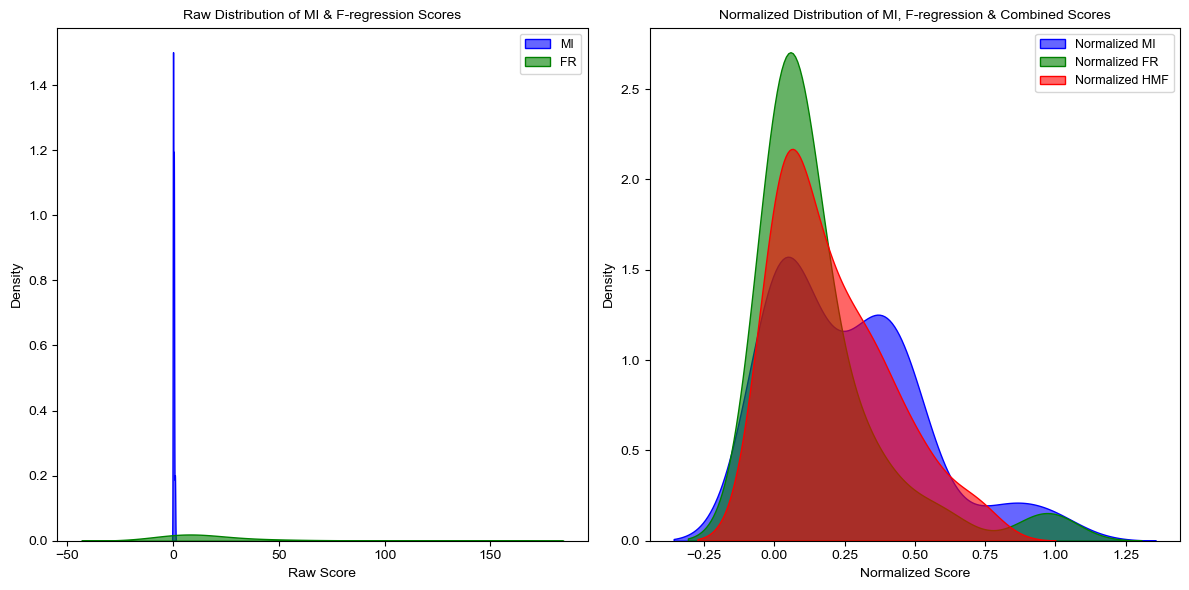

In [17]:
# Plot raw distributions
plt.figure(figsize=(12, 6))

# Raw distribution plot (unchanged)
plt.subplot(1, 2, 1)
sns.kdeplot(features_df['Information_Gain'], fill=True, color='blue', label="MI", alpha=0.6)
sns.kdeplot(features_df['F_Score'], fill=True, color='green', label="FR", alpha=0.6)
plt.xlabel('Raw Score')
plt.ylabel('Density')
plt.title('Raw Distribution of MI & F-regression Scores')
plt.legend()

# Normalized distribution plot
plt.subplot(1, 2, 2)
sns.kdeplot(features_df['Normalized_MI'], fill=True, color='blue', label="Normalized MI", alpha=0.6)
sns.kdeplot(features_df['Normalized_F'], fill=True, color='green', label="Normalized FR", alpha=0.6)
sns.kdeplot(features_df['Combined_Score'], fill=True, color='red', label="Normalized HMF", alpha=0.6)
plt.xlabel('Normalized Score')
plt.ylabel('Density')
plt.title('Normalized Distribution of MI, F-regression & Combined Scores')
plt.legend()

plt.tight_layout()
plt.savefig("Normalization.pdf")  # Save BEFORE show
plt.show()

Models evaluation evalution under different subsets

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


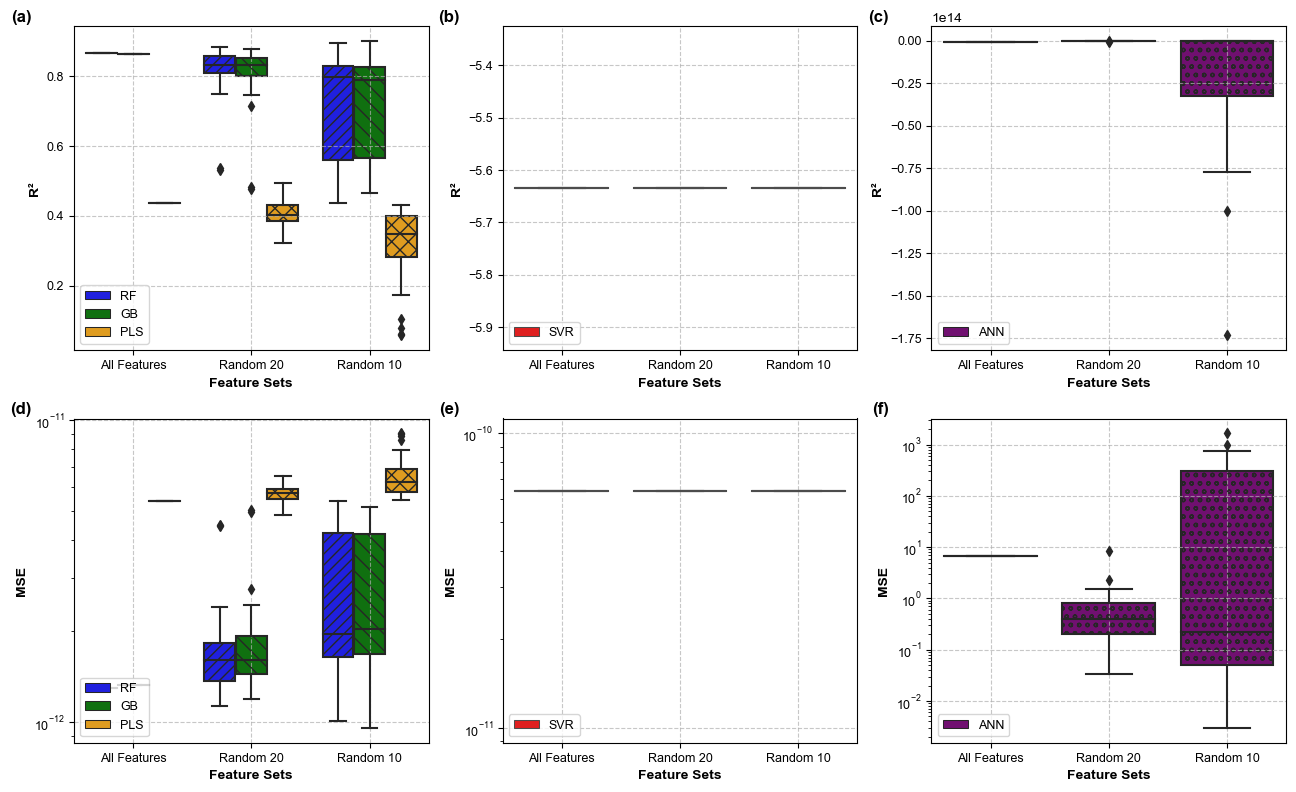

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X, y are defined properly here as your feature matrix and target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "RF": RandomForestRegressor(random_state=42),
    "GB": GradientBoostingRegressor(random_state=42),
    "PLS": PLSRegression(n_components=2),
    "SVR": SVR(),
    "ANN": MLPRegressor(random_state=42, max_iter=500)
}

def evaluate_model(X_train, X_test, y_train, y_test, models, feature_subset):
    results = []
    for name, model in models.items():
        try:
            model.fit(X_train[feature_subset], y_train)
            y_pred = model.predict(X_test[feature_subset])
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            results.append((name, r2, mse))
        except Exception:
            results.append((name, np.nan, np.nan))
    return results

all_features_results = evaluate_model(X_train, X_test, y_train, y_test, models, X.columns)

def evaluate_random_features(X, num_features, num_sets=50):
    np.random.seed(42)
    results = []
    feature_names = list(X.columns)
    for _ in range(num_sets):
        selected_features = np.random.choice(feature_names, num_features, replace=False)
        results.extend(evaluate_model(X_train, X_test, y_train, y_test, models, list(selected_features)))
    return results

random_20_results = evaluate_random_features(X, 20)
random_10_results = evaluate_random_features(X, 10)

all_results = [('All Features', *res) for res in all_features_results]
all_results += [('Random 20', *res) for res in random_20_results]
all_results += [('Random 10', *res) for res in random_10_results]

results_df = pd.DataFrame(all_results, columns=['Feature Set', 'Model', 'R²', 'MSE'])

# Define custom colors (consistent for all plots)
model_colors = {
    "RF": "blue",
    "GB": "green",
    "PLS": "orange",
    "SVR": "red",
    "ANN": "purple"
}

# Hatch patterns for models
hatches = {'RF': '///', 'GB': '\\\\', 'PLS': 'xx', 'SVR': '...', 'ANN': 'oo'}

# Split results into groups for plotting
group1 = results_df[results_df['Model'].isin(["RF", "GB", "PLS"])]
group2 = results_df[results_df['Model'] == "SVR"]
group3 = results_df[results_df['Model'] == "ANN"]

# Create combined figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(13, 8))

# Subplot labels (a) to (f)
subplot_letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Plot R² for top row with hatches
for i, (ax, group) in enumerate(zip(axes[0], [group1, group2, group3])):
    box = sns.boxplot(data=group, x='Feature Set', y='R²', hue='Model', ax=ax, palette=model_colors)
    ax.set_xlabel('Feature Sets', fontsize=10, fontweight='bold')
    ax.set_ylabel('R²', fontsize=10, fontweight='bold')
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='lower left', fontsize=9, frameon=True)
    ax.text(-0.12, 1.05, subplot_letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
    ax.set_title('')

    # Apply hatches
    num_feature_sets = group['Feature Set'].nunique()
    models_in_group = group['Model'].unique()
    patches_per_feature_set = len(models_in_group)
    for j, patch in enumerate(ax.patches):
        model_idx = j % patches_per_feature_set
        model_name = models_in_group[model_idx]
        patch.set_hatch(hatches.get(model_name, ''))

# Plot MSE for bottom row with hatches
for i, (ax, group) in enumerate(zip(axes[1], [group1, group2, group3])):
    box = sns.boxplot(data=group, x='Feature Set', y='MSE', hue='Model', ax=ax, palette=model_colors)
    ax.set_xlabel('Feature Sets', fontsize=10, fontweight='bold')
    ax.set_ylabel('MSE', fontsize=10, fontweight='bold')
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='lower left', fontsize=9, frameon=True)
    ax.text(-0.12, 1.05, subplot_letters[i + 3], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
    ax.set_title('')

    # Apply hatches
    num_feature_sets = group['Feature Set'].nunique()
    models_in_group = group['Model'].unique()
    patches_per_feature_set = len(models_in_group)
    for j, patch in enumerate(ax.patches):
        model_idx = j % patches_per_feature_set
        model_name = models_in_group[model_idx]
        patch.set_hatch(hatches.get(model_name, ''))

plt.tight_layout()
plt.savefig("Fig3f.pdf", dpi=300, bbox_inches='tight')
plt.savefig("Fig3f.eps", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


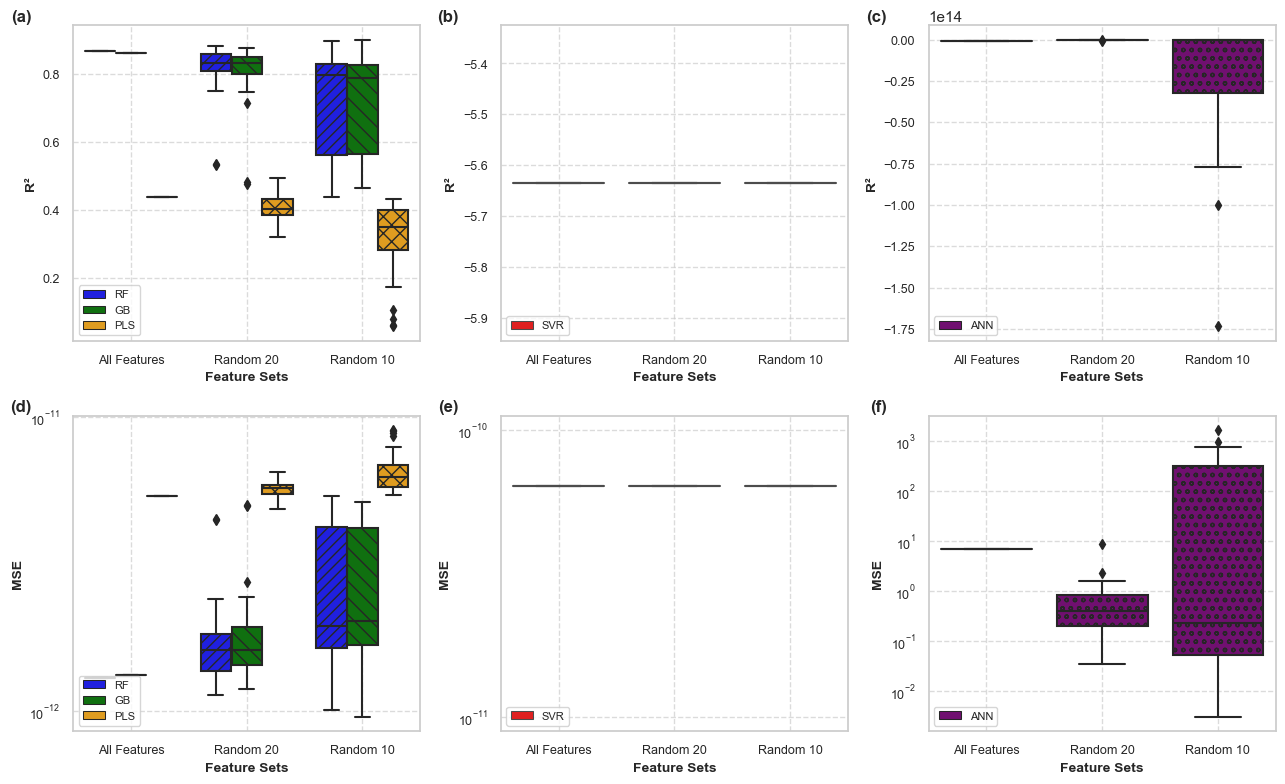

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# --- Journal Compliance Settings ---
#import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'  # or Helvetica
mpl.rcParams['font.size'] = 10  # 2–3 mm
mpl.rcParams['ps.fonttype'] = 42  # Embed fonts in EPS
mpl.rcParams['pdf.fonttype'] = 42
fig.set_size_inches(6.6, 4.5)  # 174mm x 114mm
#mpl.rcParams['pdf.fonttype'] = 42  # TrueType fonts
#mpl.rcParams['ps.fonttype'] = 42
sns.set(style="whitegrid")

# === DATA SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === MODEL DEFINITIONS ===
models = {
    "RF": RandomForestRegressor(random_state=42),
    "GB": GradientBoostingRegressor(random_state=42),
    "PLS": PLSRegression(n_components=2),
    "SVR": SVR(),
    "ANN": MLPRegressor(random_state=42, max_iter=500)
}

def evaluate_model(X_train, X_test, y_train, y_test, models, feature_subset):
    results = []
    for name, model in models.items():
        try:
            model.fit(X_train[feature_subset], y_train)
            y_pred = model.predict(X_test[feature_subset])
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            results.append((name, r2, mse))
        except Exception:
            results.append((name, np.nan, np.nan))
    return results

# === BASELINE: ALL FEATURES ===
all_features_results = evaluate_model(X_train, X_test, y_train, y_test, models, X.columns)

# === RANDOM SUBSETS EVALUATION ===
def evaluate_random_features(X, num_features, num_sets=50):
    np.random.seed(42)
    results = []
    feature_names = list(X.columns)
    for _ in range(num_sets):
        selected_features = np.random.choice(feature_names, num_features, replace=False)
        results.extend(evaluate_model(X_train, X_test, y_train, y_test, models, list(selected_features)))
    return results

random_20_results = evaluate_random_features(X, 20)
random_10_results = evaluate_random_features(X, 10)

# === COLLECT RESULTS ===
all_results = [('All Features', *res) for res in all_features_results]
all_results += [('Random 20', *res) for res in random_20_results]
all_results += [('Random 10', *res) for res in random_10_results]

results_df = pd.DataFrame(all_results, columns=['Feature Set', 'Model', 'R²', 'MSE'])

# === PLOTTING ===
model_colors = {"RF": "blue", "GB": "green", "PLS": "orange", "SVR": "red", "ANN": "purple"}
hatches = {'RF': '///', 'GB': '\\\\', 'PLS': 'xx', 'SVR': '...', 'ANN': 'oo'}

group1 = results_df[results_df['Model'].isin(["RF", "GB", "PLS"])]
group2 = results_df[results_df['Model'] == "SVR"]
group3 = results_df[results_df['Model'] == "ANN"]

fig, axes = plt.subplots(2, 3, figsize=(13, 8))  # ~174mm width for 2-column Springer

subplot_letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# --- Top Row: R² ---
for i, (ax, group) in enumerate(zip(axes[0], [group1, group2, group3])):
    sns.boxplot(data=group, x='Feature Set', y='R²', hue='Model', ax=ax, palette=model_colors)
    ax.set_xlabel('Feature Sets', fontsize=10, fontweight='bold')
    ax.set_ylabel('R²', fontsize=10, fontweight='bold')
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='lower left', fontsize=8, frameon=True)
    ax.text(-0.12, 1.05, subplot_letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
    ax.set_title('')
    
    # Hatching
    models_in_group = group['Model'].unique()
    patches_per_feature_set = len(models_in_group)
    for j, patch in enumerate(ax.patches):
        model_idx = j % patches_per_feature_set
        model_name = models_in_group[model_idx]
        patch.set_hatch(hatches.get(model_name, ''))

# --- Bottom Row: MSE ---
for i, (ax, group) in enumerate(zip(axes[1], [group1, group2, group3])):
    sns.boxplot(data=group, x='Feature Set', y='MSE', hue='Model', ax=ax, palette=model_colors)
    ax.set_xlabel('Feature Sets', fontsize=10, fontweight='bold')
    ax.set_ylabel('MSE', fontsize=10, fontweight='bold')
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='lower left', fontsize=8, frameon=True)
    ax.text(-0.12, 1.05, subplot_letters[i + 3], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
    ax.set_title('')
    
    models_in_group = group['Model'].unique()
    patches_per_feature_set = len(models_in_group)
    for j, patch in enumerate(ax.patches):
        model_idx = j % patches_per_feature_set
        model_name = models_in_group[model_idx]
        patch.set_hatch(hatches.get(model_name, ''))

plt.tight_layout()
plt.savefig("Fig3fffff.pdf", dpi=300, bbox_inches='tight')
plt.savefig("Fig3fffff.eps", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
import matplotlib
import matplotlib.pyplot as plt

# Set global font and figure parameters
matplotlib.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],  # Replace with Helvetica if needed
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 9,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9
})

# Create R² boxplots
fig_r2, axes_r2 = plt.subplots(1, 3, figsize=(6.6, 3.2))  # 174mm wide
titles = ['(a)', '(b)', '(c)']

for ax, group, title in zip(axes_r2, [group1, group2, group3], titles):
    sns.boxplot(data=group, x='Feature Set', y='R²', hue='Model', ax=ax, palette=model_colors)
    ax.set_xlabel('')
    ax.set_ylabel('R²')
    ax.text(-0.1, 1.05, title, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='left')
    ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    if title != '(a)':
        ax.get_legend().remove()
    else:
        ax.legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.savefig("r2_comparison_final.eps", dpi=600, bbox_inches='tight')
plt.savefig("r2_comparison_final.png", dpi=600, bbox_inches='tight')
plt.close()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Performing zone Identification 

In [21]:
df = pd.read_csv("Data/RF_SELECTION_METHODS_EVALUATION.csv", encoding='ISO-8859-1')#contain all MSE AND R2 for all features extraction methods by importance
# Load the dataset


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


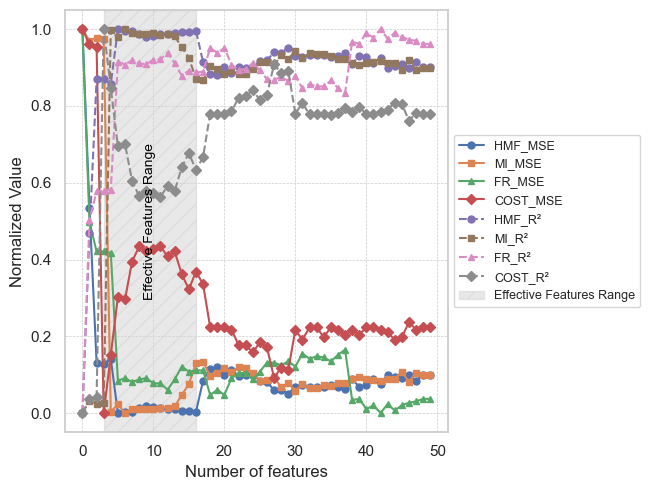

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Font and EPS compatibility
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 10
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['pdf.fonttype'] = 42

# Assume df is already loaded
# df = pd.read_csv("RF_SELECTION_METHODS_EVALUATION.csv")

# Metric columns
mse_columns = ['HMF_MSE', 'MI_MSE', 'FR_MSE', 'COST_MSE']
r2_columns = ['HMF_R²', 'MI_R²', 'FR_R²', 'COST_R²']
markers = ['o', 's', '^', 'D']  # Different markers for each method

# Normalize
df_normalized = df.copy()
for col in mse_columns + r2_columns:
    df_normalized[col + '_normalized'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Create plot
fig, ax = plt.subplots(figsize=(6.6, 5))  # 174 mm × 234 mm

# Plot normalized MSE (solid lines with markers)
for col, marker in zip(mse_columns, markers):
    ax.plot(df.index, df_normalized[col + '_normalized'],
            label=col, linestyle='solid', marker=marker, markersize=5)

# Plot normalized R² (dashed lines with same markers)
for col, marker in zip(r2_columns, markers):
    ax.plot(df.index, df_normalized[col + '_normalized'],
            label=col, linestyle='dashed', marker=marker, markersize=5)

# Highlight range
ax.axvspan(3, 16, ymin=0, ymax=1, color='lightgray', alpha=0.5, hatch='//', label="Effective Features Range")
ax.text(9.5, 0.5, "Effective Features Range", fontsize=10, color='black',
        ha='center', va='center', rotation=90)

# Axis labels and title
ax.set_xlabel('Number of features')
ax.set_ylabel('Normalized Value')
#ax.set_title('Normalized MSE and R² Trends')

# Legend outside
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save EPS
fig.savefig("Fig4.eps", format='eps', bbox_inches='tight')
fig.savefig("Fig4x.pdf", format='pdf', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


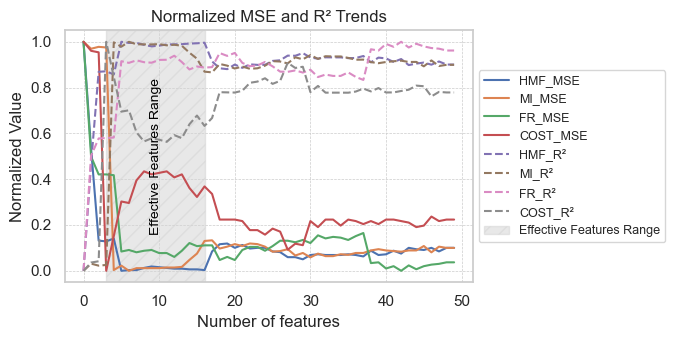

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Optional: configure font and EPS compatibility
mpl.rcParams['font.family'] = 'Arial'         # Use Arial or Helvetica
mpl.rcParams['font.size'] = 10
mpl.rcParams['ps.fonttype'] = 42              # Embed fonts for EPS
mpl.rcParams['pdf.fonttype'] = 42

# Load the dataset
# df = pd.read_csv("RF_SELECTION_METHODS_EVALUATION.csv")  # Uncomment and use actual file

# Columns for MSE and R²
mse_columns = ['HMF_MSE', 'MI_MSE', 'FR_MSE', 'COST_MSE']
r2_columns = ['HMF_R²', 'MI_R²', 'FR_R²', 'COST_R²']

# Normalize the values (Min-Max scaling)
df_normalized = df.copy()
for col in mse_columns + r2_columns:
    col_norm = col + '_normalized'
    df_normalized[col_norm] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Create figure with max size (174 mm x 234 mm)
fig, ax = plt.subplots(figsize=(6.85, 3.5))  # inches (converted from mm)

# Plot normalized MSE values with solid lines
for col in mse_columns:
    ax.plot(df.index, df_normalized[col + '_normalized'], label=col, linestyle='solid')

# Plot normalized R² values with dashed lines
for col in r2_columns:
    ax.plot(df.index, df_normalized[col + '_normalized'], label=col, linestyle='dashed')

# Highlight "Effective Features Range"
ax.axvspan(3, 16, ymin=0, ymax=1, color='lightgray', alpha=0.5, hatch='//', label="Effective Features Range")
ax.text(9.5, 0.5, "Effective Features Range", fontsize=10, color='black',
        ha='center', va='center', rotation=90)

# Labels and legend
ax.set_xlabel('Number of features')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized MSE and R² Trends')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save as EPS for journal submission
fig.savefig("Fig4.eps", format='eps', bbox_inches='tight')
fig.savefig("Fig4.pdf", format='pdf', bbox_inches='tight')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

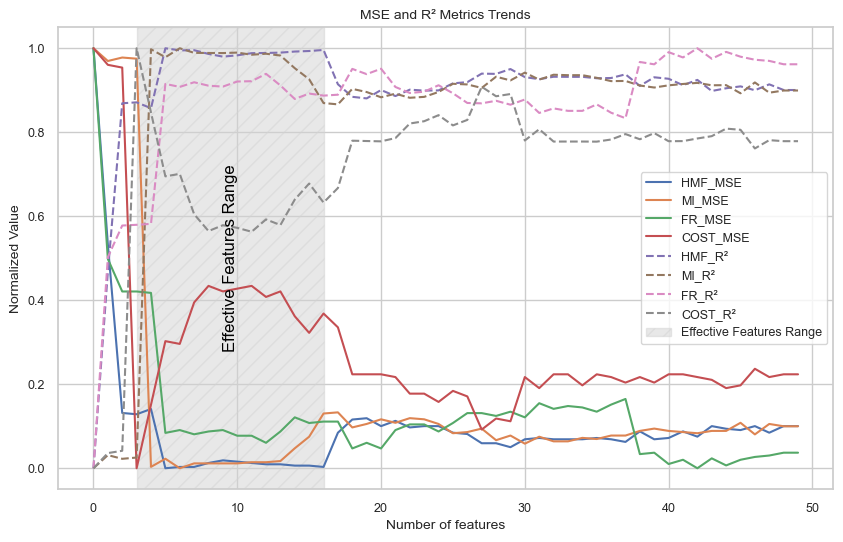

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv("RF_SELECTION_METHODS_EVALUATION.csv")\  # Replace with your actual file name

# Select relevant columns for MSE and R²
mse_columns = ['HMF_MSE', 'MI_MSE', 'FR_MSE', 'COST_MSE']
r2_columns = ['HMF_R²', 'MI_R²', 'FR_R²', 'COST_R²']

# Min-Max Normalization
df_normalized = df.copy()
for col in mse_columns + r2_columns:
    df_normalized[col + '_normalized'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Create the plot
plt.figure(figsize=(10, 6))

# Plot normalized MSE values
for col in mse_columns:
    sns.lineplot(x=df.index, y=df_normalized[col + '_normalized'], label=f'{col}', linestyle='solid')

# Plot normalized R² values with different linestyle
for col in r2_columns:
    sns.lineplot(x=df.index, y=df_normalized[col + '_normalized'], label=f'{col}', linestyle='dashed')

# Highlight effective features range
plt.axvspan(3, 16, ymin=0, ymax=1, color='lightgray', alpha=0.5, hatch='//', label="Effective Features Range")
plt.text(9.5, 0.5, "Effective Features Range", fontsize=12, color='black', ha='center', va='center', rotation=90)

# Labels and title
plt.xlabel('Number of features')
plt.ylabel('Normalized Value')
plt.title('MSE and R² Metrics Trends')
plt.savefig("mse_r2_reog.pdf")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Evaluation of Selection Methods over performing zone

1.MSE,BOXPLOT

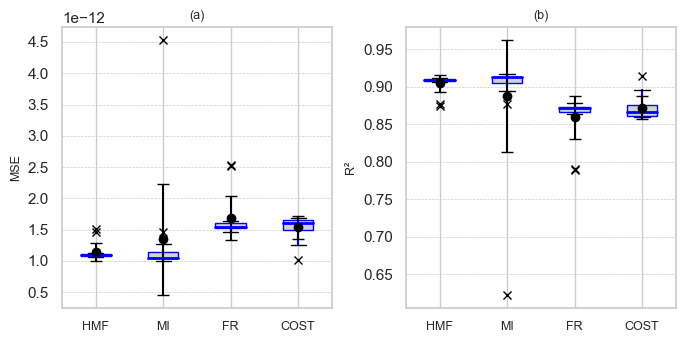

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set journal-compatible fonts and formats
mpl.rcParams['font.family'] = 'Arial'   # NCA prefers sans-serif (Arial or Helvetica)
mpl.rcParams['font.size'] = 9           # Standard 9 pt font
mpl.rcParams['ps.fonttype'] = 42 
# Load data
df3 = pd.read_csv("Data/RF_Perfrming_Zone.csv")

# Prepare data
mse_data = [df3["HMF_MSE"], df3["MI_MSE"], df3["FR_MSE"], df3["COST_MSE"]]
r2_data = [df3["HMF_R2"], df3["MI_R2"], df3["FR_R2"], df3["COST_R2"]]

# Calculate means and stds
mse_means = [np.mean(data) for data in mse_data]
mse_stds = [np.std(data) for data in mse_data]
r2_means = [np.mean(data) for data in r2_data]
r2_stds = [np.std(data) for data in r2_data]

# Set up plot — width in inches to match 84 mm (≈ 3.31 inches)
fig, axs = plt.subplots(1, 2, figsize=(6.8, 3.5))  # approx 168mm x 89mm (fits two side-by-side in 174 mm width)

# Shared style properties for grayscale
box_style = dict(facecolor='lightgray', color='blue')
whisker_style = dict(color='blue', linewidth=1.5)
flier_style = dict(marker='x', markerfacecolor='none', markeredgecolor='black', markersize=6)  # black × for outliers
median_style = dict(color='blue', linewidth=2)
font = {'fontsize': 9}

# Plot MSE
axs[0].boxplot(mse_data, vert=True, patch_artist=True,
               boxprops=box_style,
               whiskerprops=whisker_style,
               flierprops=flier_style,
               medianprops=median_style)
for i, (mean, std) in enumerate(zip(mse_means, mse_stds)):
    axs[0].errorbar(i + 1, mean, yerr=std, fmt='o', color='black', capsize=4)
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(["HMF", "MI", "FR", "COST"], fontdict=font)
axs[0].set_ylabel("MSE", **font)
axs[0].set_title("(a)", **font)
axs[0].grid(axis='y', linestyle='--', linewidth=0.5)

# Plot R²
axs[1].boxplot(r2_data, vert=True, patch_artist=True,
               boxprops=box_style,
               whiskerprops=whisker_style,
               flierprops=flier_style,
               medianprops=median_style)
for i, (mean, std) in enumerate(zip(r2_means, r2_stds)):
    axs[1].errorbar(i + 1, mean, yerr=std, fmt='o', color='black', capsize=4)
axs[1].set_xticks([1, 2, 3, 4])
axs[1].set_xticklabels(["HMF", "MI", "FR", "COST"], fontdict=font)
axs[1].set_ylabel("R²", **font)
axs[1].set_title("(b)", **font)
axs[1].grid(axis='y', linestyle='--', linewidth=0.5)

# Final layout
plt.tight_layout()

# Save figure in vector format (PDF), suitable for submission
plt.savefig("Fig5.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("Fig5.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()